****Starting Netflix Analysis Project****

In [1]:
import numpy as np #mathematical operations
import pandas as pd #data cleaning, filtering, grouping, and merging
import matplotlib.pyplot as plt #for visualization
import seaborn as sns #add more detail analysis in bar/graph data

#load the dataset
df = pd.read_csv('netflix_titles.csv')

#total rows
total_rows = len(df)
print(f"Total rows: {total_rows}")

#display the first few rows
df.head(5)

Total rows: 8807


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


**Data Cleaning**

In [2]:
#fill missing 'country' values with the most frequent country
df['country'] = df['country'].fillna(df['country'].mode()[0])

#replace missing 'cast' and 'director' with 'No Data'
df['cast'] = df['cast'].fillna('No Data')
df['director'] = df['director'].fillna('No Data')

#drop rows with any remaining missing values
df = df.dropna()

#remove duplicate entries
df = df.drop_duplicates()

****🔍 Preview of Cleaned Netflix Dataset (Top 5 Rows)****

In [4]:
df[['title', 'type', 'director', 'country', 'release_year', 'duration', 'listed_in', 'rating']].head(5)

,title,type,director,country,release_year,duration,listed_in,rating
0,Dick Johnson Is Dead,Movie,Kirsten Johnson,United States,2020,90 min,Documentaries,PG-13
1,Blood & Water,TV Show,No Data,South Africa,2021,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries",TV-MA
2,Ganglands,TV Show,Julien Leclercq,United States,2021,1 Season,"Crime TV Shows, International TV Shows, TV Act...",TV-MA
3,Jailbirds New Orleans,TV Show,No Data,United States,2021,1 Season,"Docuseries, Reality TV",TV-MA
4,Kota Factory,TV Show,No Data,India,2021,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",TV-MA


**Main Analysis**

**1. Content Type Analysis**

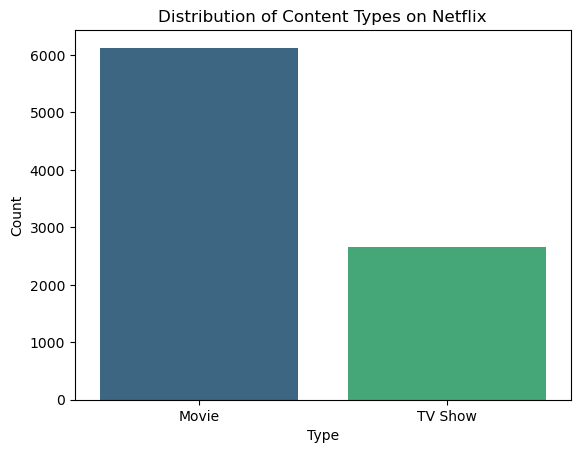

In [5]:
#using matplotlib to show visual for better understanding
content_counts = df['type'].value_counts()

sns.barplot(x=content_counts.index, y=content_counts.values, hue=content_counts.index,
            palette='viridis', legend=False)
plt.title('Distribution of Content Types on Netflix')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

**2. Top Countries produce the most content on Netflix**

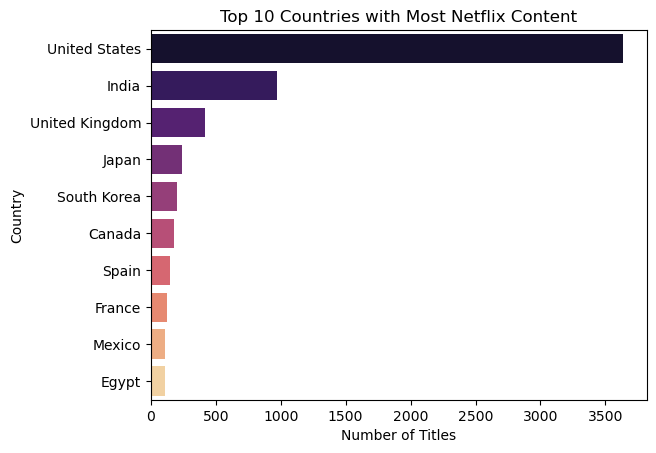

In [6]:
country_data = df['country'].value_counts().head(10)

#using matplotlib nd prepare the data for plotting
country_df = pd.DataFrame({
    'Country': country_data.index,
    'Count': country_data.values
})

#plotting data
sns.barplot(data=country_df, x='Count', y='Country', hue='Country', 
            palette='magma', legend=False)
plt.title('Top 10 Countries with Most Netflix Content')
plt.xlabel('Number of Titles')
plt.ylabel('Country')
plt.show()

**3. Number of Netflix titles grew over the Years**

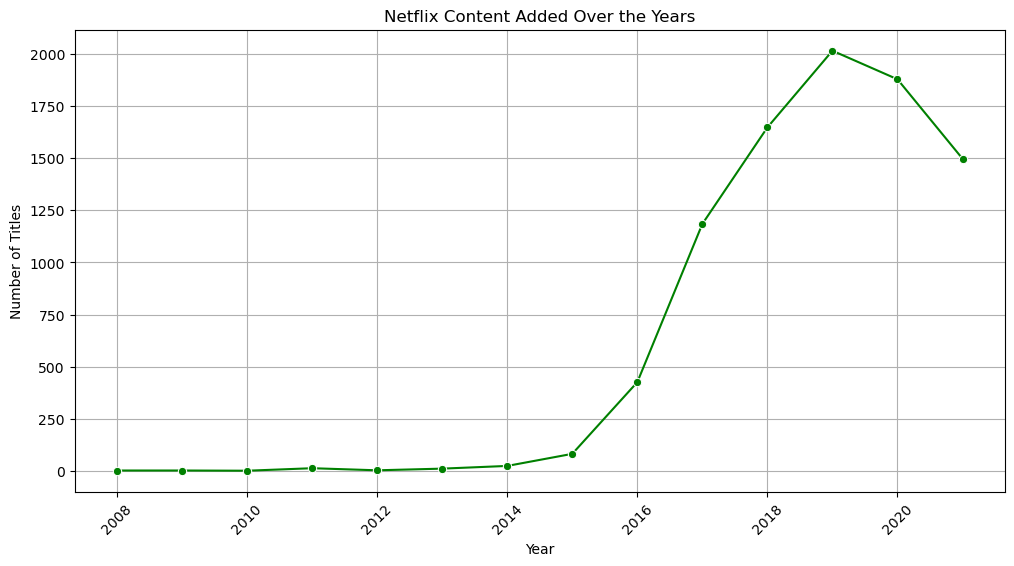

In [7]:
#strip spaces first, then convert
df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), format='%B %d, %Y', errors='coerce')

#remove rows where conversion failed
df = df.dropna(subset=['date_added'])

#extract year
df['year_added'] = df['date_added'].dt.year

#count content by year
yearly_data = df['year_added'].value_counts().sort_index()

#plotting
plt.figure(figsize=(12,6))
sns.lineplot(x=yearly_data.index, y=yearly_data.values, marker='o', color='green')
plt.title('Netflix Content Added Over the Years')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

**4. Popular Genres**

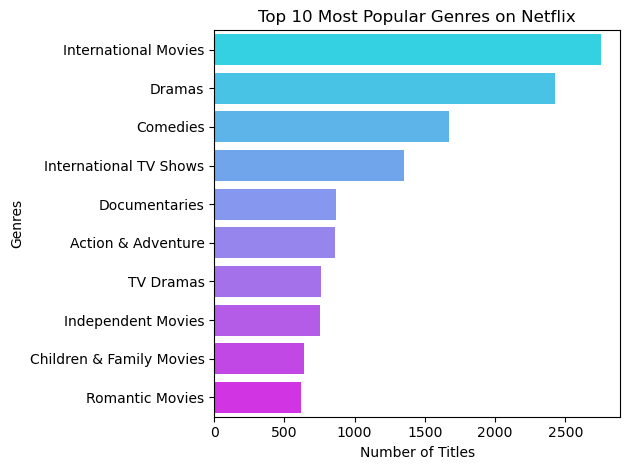

In [8]:
#split genres and count
genre_data = df['listed_in'].dropna().str.split(', ')
all_genres = genre_data.explode()
top_genres = all_genres.value_counts().head(10)

#plotting
sns.barplot(
    x=top_genres.values,
    y=top_genres.index,
    hue=top_genres.index,        
    palette='cool',
    legend=False
)

plt.title('Top 10 Most Popular Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genres')
plt.tight_layout()
plt.show()

**5. Movie Duration**

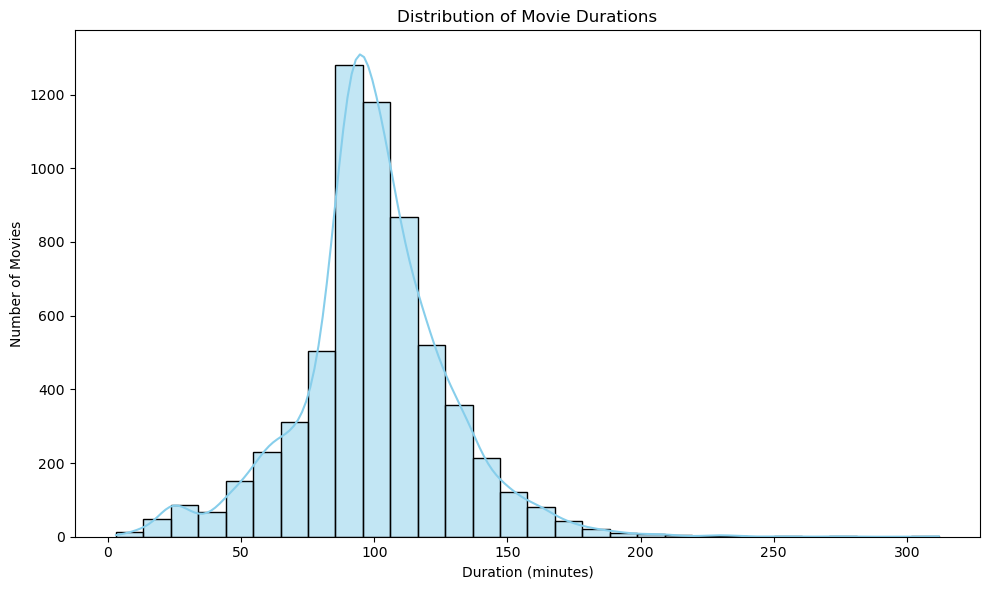

In [11]:
#filtering
movie_df = df[df['type'] == 'Movie'].copy()

#clean and convert duration to numeric
movie_df['duration'] = movie_df['duration'].str.replace(' min', '', regex=False)
movie_df['duration'] = pd.to_numeric(movie_df['duration'], errors='coerce')

#plotting
plt.figure(figsize=(10, 6))
sns.histplot(movie_df['duration'].dropna(), bins=30, kde=True, color='skyblue')
plt.title('Distribution of Movie Durations')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.tight_layout()
plt.show()

**Tools I Used:**

*1. Numpy for numeric operations*

*2. Pandas for data handling*

*3. Matplotlib/Seaborn for visualizations*

**What I Learned**

*Through this Netflix Data Analysis project, I gained a solid understanding of how to handle real-world datasets and draw useful insights using Python.*

**Skills Gained**

*1. Data Cleaning: Handled missing values and made the dataset ready for analysis using pandas.*

*2. Exploratory Data Analysis (EDA): Learned to explore data trends and patterns using basic statistics.*

*3. Data Visualization: Used matplotlib and seaborn to create meaningful graphs and charts.*

*4. Working with Dates: Extracted years and analyzed time-based data using pd.to_datetime.*

*5. String Manipulation: Cleaned and transformed text columns like "genre" and "duration".*

*6. Basic Python Logic: Applied loops, filtering, and sorting to organize and present the data.*

<p style="text-align:center; font-weight:bold; font-size:16px;">
Even as a beginner, I now understand the core data science flow: cleaning → analyzing → visualizing → uncovering insights.
</p>